# Codigo base

In [1]:
source("utils.r")

# Cargar datos

In [2]:
# Example of how to call the function
url <- "https://github.com/mbarrena/tesis/blob/main/data/Data%20trimestral%201950%20a%202023%20con%201%20DUMMY%20CORTA%20outliers%20(2q%203q%201989%201q1990)%20.xlsx?raw=true"
temp_file <- tempfile(fileext = ".xlsx")
GET(url, write_disk(temp_file, overwrite = TRUE))

# Read the `data` from the Excel file
df_trimestral_crudo <- read_excel(temp_file)

Response [https://raw.githubusercontent.com/mbarrena/tesis/refs/heads/main/data/Data%20trimestral%201950%20a%202023%20con%201%20DUMMY%20CORTA%20outliers%20(2q%203q%201989%201q1990)%20.xlsx]
  Date: 2025-04-01 02:47
  Status: 200
  Content-Type: application/octet-stream
  Size: 56.7 kB
<ON DISK>  /tmp/RtmpC8vKo4/file10d416351df9c.xlsxNULL

In [3]:
# Select specific columns and rows from df_trimestral_crudo
df_Arg <- df_trimestral_crudo |> 
  dplyr::slice(37:dplyr::n()) |>  # Equivalent to iloc[36:] (1-based index in R)
  dplyr::select(año, trimestre, ipc_ajust, E, Ebc, pbird, impp_usa, Psoja_USA, Pmaíz_USA, Ptrigo_USA, TOTfmi, D1) |>  # nolint
  as.data.frame()  # Convert to data frame (if needed)

# Rename "ipc_ajust" to "ipc"
df_Arg <- renameColumnOfDataframe(df_Arg, "ipc_ajust", "ipc")

# Display first 6 rows
print(head(df_Arg))

# Display first 65 rows
print(head(df_Arg, 65))

   año trimestre          ipc            E          Ebc  pbird impp_usa
1 1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2 1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.25134
3 1959      3ºTr 3.511185e-11 8.408333e-12 8.414333e-12 166259 13.27944
4 1959      4ºTr 3.704045e-11 8.313333e-12 8.275667e-12 178163 13.47618
5 1960      1ºTr 3.935256e-11 8.293333e-12 8.297333e-12 186316 13.50428
6 1960      2ºTr 3.948672e-11 8.300000e-12 8.313000e-12 187541 13.51833
  Psoja_USA Pmaíz_USA Ptrigo_USA TOTfmi D1
1  2.046667 1.0433333   1.736667     NA  0
2  2.106667 1.1500000   1.743333     NA  0
3  1.976667 1.1166667   1.723333     NA  0
4  1.970000 0.9856667   1.780000     NA  0
5  1.996667 1.0096667   1.800000     NA  0
6  1.996667 1.0766667   1.786667     NA  0
    año trimestre          ipc            E          Ebc  pbird impp_usa
1  1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2  1959      2ºTr 3.074744e-11 8.556667e-12 8.317

In [4]:
# Copy df_Arg to df_ERPT_Arg1
df_ERPT_Arg1 <- df_Arg

# Display first rows
print(head(df_ERPT_Arg1))

# Apply logarithm to specific columns
df_ERPT_Arg1 <- makeLogColumns(c("ipc", "E", "Ebc", "pbird", "impp_usa", "Psoja_USA", "Pmaíz_USA", "Ptrigo_USA", "TOTfmi"), df_ERPT_Arg1) # nolint: line_length_linter.

# Display transformed dataframe
print(head(df_ERPT_Arg1))
print(tail(df_ERPT_Arg1))

   año trimestre          ipc            E          Ebc  pbird impp_usa
1 1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2 1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.25134
3 1959      3ºTr 3.511185e-11 8.408333e-12 8.414333e-12 166259 13.27944
4 1959      4ºTr 3.704045e-11 8.313333e-12 8.275667e-12 178163 13.47618
5 1960      1ºTr 3.935256e-11 8.293333e-12 8.297333e-12 186316 13.50428
6 1960      2ºTr 3.948672e-11 8.300000e-12 8.313000e-12 187541 13.51833
  Psoja_USA Pmaíz_USA Ptrigo_USA TOTfmi D1
1  2.046667 1.0433333   1.736667     NA  0
2  2.106667 1.1500000   1.743333     NA  0
3  1.976667 1.1166667   1.723333     NA  0
4  1.970000 0.9856667   1.780000     NA  0
5  1.996667 1.0096667   1.800000     NA  0
6  1.996667 1.0766667   1.786667     NA  0
   año trimestre       ipc         E       Ebc    pbird impp_usa Psoja_USA
1 1959      1ºTr -24.44751 -25.73041 -25.73350 12.08546 2.583038 0.7162125
2 1959      2ºTr -24.20521 -25.48431 -25.5127

In [5]:
# Create df_ERPT_Arg as a copy of df_Arg
df_ERPT_Arg <- df_Arg

# Display first rows
print(head(df_ERPT_Arg))

# Apply logarithm transformation
df_ERPT_Arg <- makeLogColumns(c("ipc", "E", "Ebc", "pbird", "impp_usa", "Psoja_USA", "Pmaíz_USA", "Ptrigo_USA", "TOTfmi"), df_ERPT_Arg)

# Display transformed dataframe
print(head(df_ERPT_Arg))

# Apply differencing transformation
df_ERPT_Arg <- makeDiffColumns(c("ipc", "E", "Ebc", "pbird", "impp_usa", "Psoja_USA", "Pmaíz_USA", "Ptrigo_USA", "TOTfmi"), df_ERPT_Arg)

# Display first and last rows
print(head(df_ERPT_Arg))
print(tail(df_ERPT_Arg, 90))

   año trimestre          ipc            E          Ebc  pbird impp_usa
1 1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2 1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.25134
3 1959      3ºTr 3.511185e-11 8.408333e-12 8.414333e-12 166259 13.27944
4 1959      4ºTr 3.704045e-11 8.313333e-12 8.275667e-12 178163 13.47618
5 1960      1ºTr 3.935256e-11 8.293333e-12 8.297333e-12 186316 13.50428
6 1960      2ºTr 3.948672e-11 8.300000e-12 8.313000e-12 187541 13.51833
  Psoja_USA Pmaíz_USA Ptrigo_USA TOTfmi D1
1  2.046667 1.0433333   1.736667     NA  0
2  2.106667 1.1500000   1.743333     NA  0
3  1.976667 1.1166667   1.723333     NA  0
4  1.970000 0.9856667   1.780000     NA  0
5  1.996667 1.0096667   1.800000     NA  0
6  1.996667 1.0766667   1.786667     NA  0
   año trimestre       ipc         E       Ebc    pbird impp_usa Psoja_USA
1 1959      1ºTr -24.44751 -25.73041 -25.73350 12.08546 2.583038 0.7162125
2 1959      2ºTr -24.20521 -25.48431 -25.5127

# Regresiones

Threshold var is binary: will not use logistic decomposition

Run configurations:

lags_endog_lin,lags_criterion,max_lags,trend,shock_type,confint,hor,use_nw,nw_prewhite,nw_lag,adjust_se,use_twosls,model_type,starts,ends,column_names,endog
<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<int>,<chr>,<int>
NA,AIC,6,0,1,0.95,10,TRUE,TRUE,NA,FALSE,FALSE,0,1,259,"E, ipc, pbird",3


Lags for Shock: E

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,3,3,4,4,3,1,3,1,1,1
ipc,3,3,3,4,3,4,4,1,1,1
pbird,1,3,1,1,1,1,1,1,1,1


Lags for Shock: ipc

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,3,3,4,4,3,1,3,1,1,1
ipc,3,3,3,4,3,4,4,1,1,1
pbird,1,3,1,1,1,1,1,1,1,1


Lags for Shock: pbird

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,3,3,4,4,3,1,3,1,1,1
ipc,3,3,3,4,3,4,4,1,1,1
pbird,1,3,1,1,1,1,1,1,1,1


Impulse: E -> Response: ipc

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.4805585,0.48055851,0.4805585,0.480558509,4.805585e-01,4.805585e-01
2,2,0.3846618,0.12287072,0.6464529,0.823353063,2.913474e-01,1.355359e+00
3,3,0.3607182,0.09321044,0.6282259,0.205912620,-2.165860e-01,6.284112e-01
4,4,0.3588398,0.04945818,0.6682213,0.889923892,-1.643667e+00,3.423514e+00
5,5,0.2986484,-0.08469030,0.6819872,-0.009174733,NaN,NaN
6,6,0.2469909,-0.12803440,0.6220162,0.169792046,-6.883636e-01,1.027948e+00
7,7,0.2576630,-0.18093488,0.6962608,0.278007901,-1.925469e+07,1.925469e+07
8,8,0.4268213,-0.12637920,0.9800218,0.168931782,NaN,NaN
9,9,0.3582758,-0.06515015,0.7817018,0.085436976,-1.081300e-01,2.790039e-01


Impulse: E -> Response: pbird

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,1,-0.0393527471,-0.03935275,-0.03935275,-0.039352747,-0.039352747,-0.039352747
13,2,-0.0210647867,-0.05698681,0.01485724,-0.028955141,-0.025249611,-0.032660670
14,3,-0.0250356223,-0.06315982,0.01308858,0.012718083,-0.051033741,0.076469907
15,4,-0.0042003926,-0.04957121,0.04117043,-0.031428027,-0.071275964,0.008419911
16,5,0.0007112952,-0.05176409,0.05318668,0.001206072,-0.011757338,0.014169482
17,6,0.0072380809,-0.03754991,0.05202607,0.013779280,0.003943966,0.023614594
18,7,-0.0006248273,-0.04367556,0.04242591,0.002275619,-0.012237729,0.016788968
19,8,-0.0050124412,-0.06523978,0.05521490,-0.001757486,-0.012587292,0.009072319
20,9,0.0051724292,-0.02821579,0.03856065,0.010869455,-0.009029742,0.030768652


Impulse: ipc -> Response: E

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23,1,0.000000000,0.000000000,0.0000000,0.00000000,0.000000e+00,0.000000e+00
24,2,0.361813087,-0.187126936,0.9107531,17.72242081,1.647217e+01,1.897267e+01
25,3,0.283169661,-0.041360455,0.6076998,2.67823632,2.254070e+00,3.102402e+00
26,4,0.735903122,0.216372896,1.2554333,-1.69219787,-1.093140e+07,1.093140e+07
27,5,0.570277371,-0.028070450,1.1686252,5.73142657,-2.238231e+06,2.238242e+06
28,6,-0.002494714,-0.567255340,0.5622659,-0.47946645,-1.683487e+00,7.245537e-01
29,7,0.503744598,-0.163168980,1.1706582,0.65718094,4.673893e-01,8.469726e-01
30,8,0.494468265,-0.433874492,1.4228110,-0.41164478,-1.809397e+00,9.861075e-01
31,9,0.354022789,-0.132664063,0.8407096,-0.01389713,-7.363526e-02,4.584100e-02


Impulse: ipc -> Response: pbird

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,1,-0.038779768,-0.03877977,-0.038779768,-0.038779768,-0.038779768,-0.038779768
35,2,-0.007000560,-0.03325961,0.019258492,0.076319253,0.083898254,0.068740253
36,3,-0.008954245,-0.04719695,0.029288456,-0.195598334,-0.272528736,-0.118667932
37,4,0.001588379,-0.04346781,0.046644565,0.014096848,-0.007000730,0.035194427
38,5,0.011602343,-0.03715083,0.060355516,-0.015288678,-0.018001974,-0.012575382
39,6,-0.004931832,-0.04567686,0.035813200,-0.009409118,-0.015574000,-0.003244236
40,7,-0.029914942,-0.07413490,0.014305017,-0.021666286,-0.028337695,-0.014994876
41,8,-0.022826127,-0.08061343,0.034961175,0.017815941,0.011620834,0.024011047
42,9,-0.026384104,-0.05931892,0.006550714,-0.002532442,-0.006436188,0.001371305


Impulse: pbird -> Response: E

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45,1,0.0000000,0.0000000,0.0000000,0.0000000,0.000000e+00,0.000000e+00
46,2,-0.5886918,-1.7744600,0.5970765,97.5797927,9.510339e+01,1.000562e+02
47,3,-0.1915850,-1.2011354,0.8179653,-14.4720241,-1.653612e+01,-1.240793e+01
48,4,0.3775376,-0.6180778,1.3731531,-86.8188248,-6.634487e+07,6.634469e+07
49,5,-0.1012392,-0.7922975,0.5898190,-70.5828798,-1.309129e+07,1.309115e+07
50,6,0.8361960,-0.3630053,2.0353973,-55.4785770,-5.801499e+01,-5.294217e+01
51,7,-0.3633545,-1.4095418,0.6828327,-4.1314762,-1.332086e+01,5.057905e+00
52,8,-0.2576703,-1.0206693,0.5053286,-26.2032735,-3.097137e+01,-2.143518e+01
53,9,0.6700911,-0.4712670,1.8114492,-1.3527952,-3.167401e+00,4.618108e-01


Impulse: pbird -> Response: ipc

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
56,1,0.00000000,0.0000000,0.0000000,0.000000,0.000000e+00,0.000000e+00
57,2,0.21781428,-0.1338081,0.5694367,42.699632,4.171079e+01,4.368847e+01
58,3,0.33733521,-0.1121688,0.7868392,43.524073,4.220928e+01,4.483887e+01
59,4,0.30243953,-0.2145201,0.8193992,-57.853431,-5.961237e+01,-5.609449e+01
60,5,0.37397953,-0.1602961,0.9082551,-60.000781,NaN,NaN
61,6,0.60643143,-0.1281813,1.3410442,-50.796906,-5.279722e+01,-4.879660e+01
62,7,0.26868797,-0.5247873,1.0621633,-19.778113,-1.247483e+08,1.247483e+08
63,8,-0.12908487,-0.8292444,0.5710747,-60.552515,NaN,NaN
64,9,0.64518133,-0.3542614,1.6446241,-2.378149,-5.891384e+00,1.135086e+00


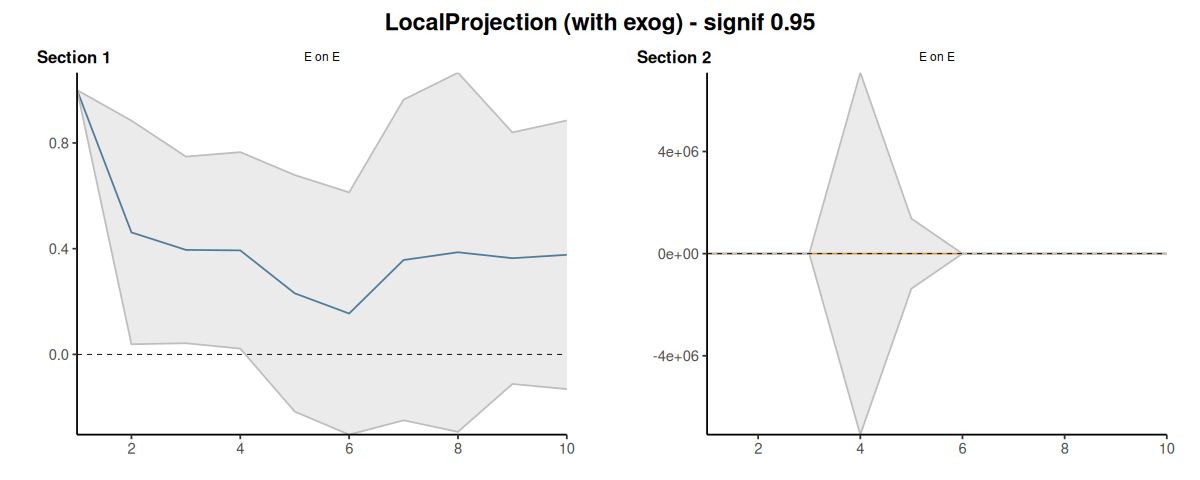

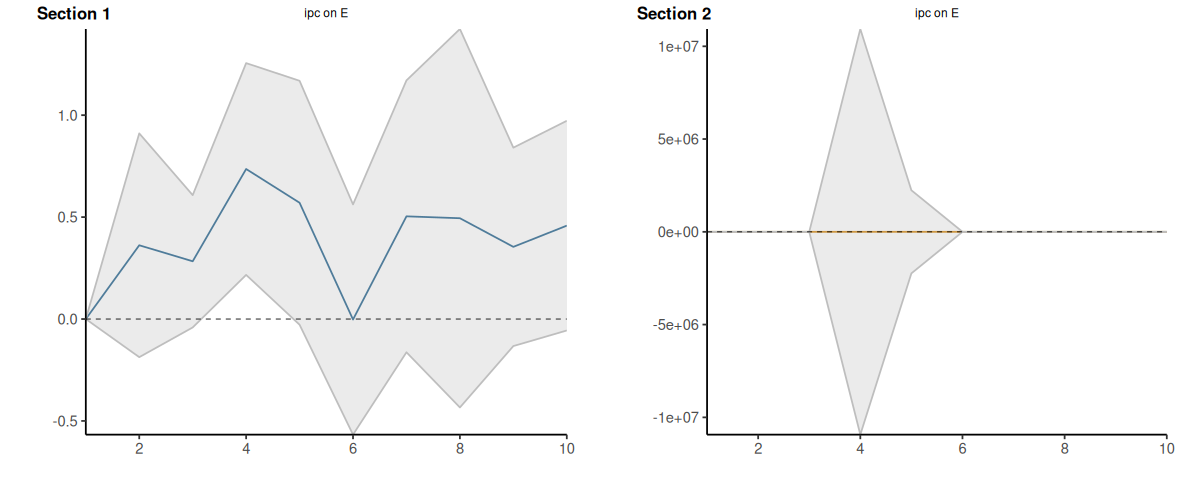

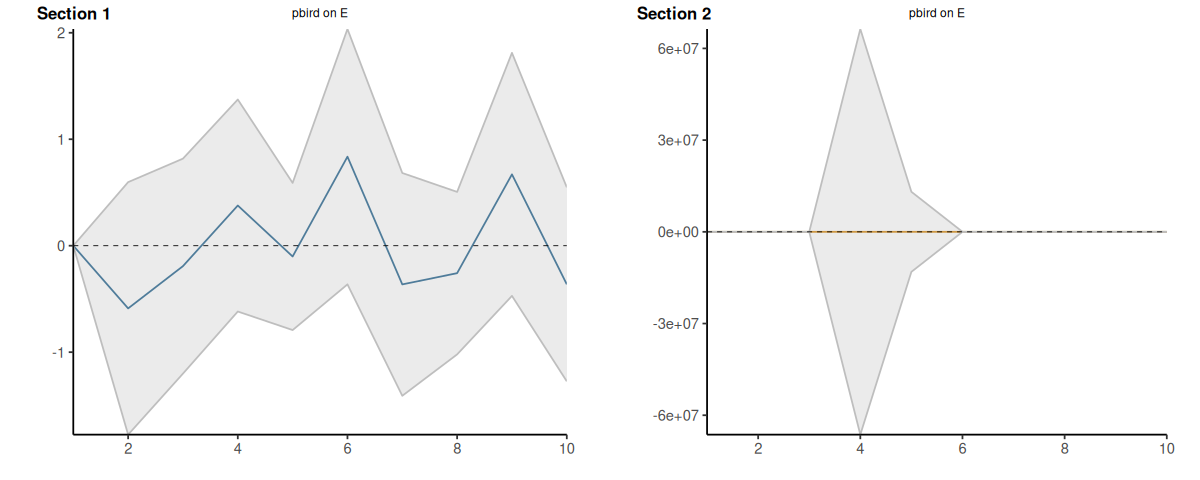

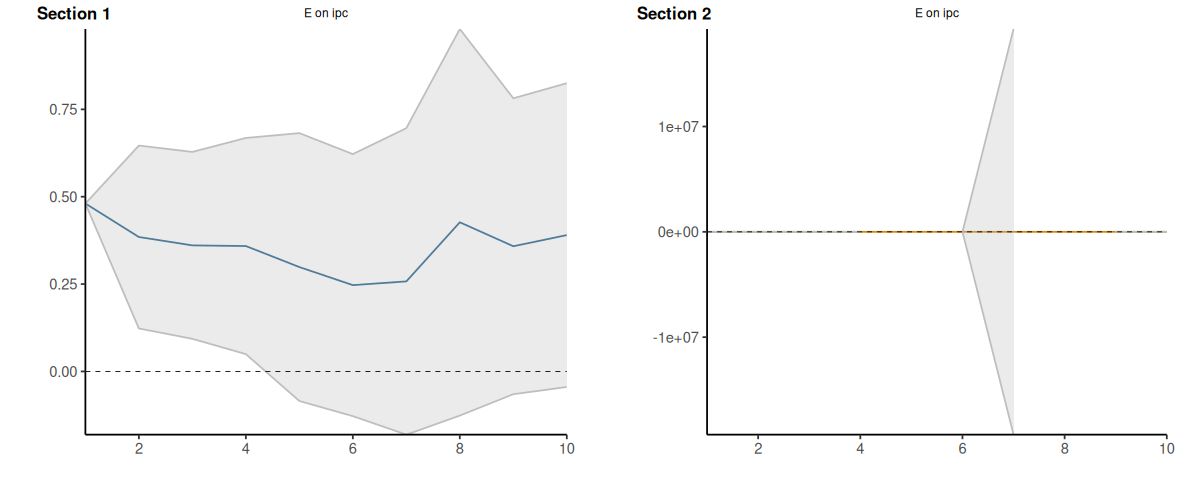

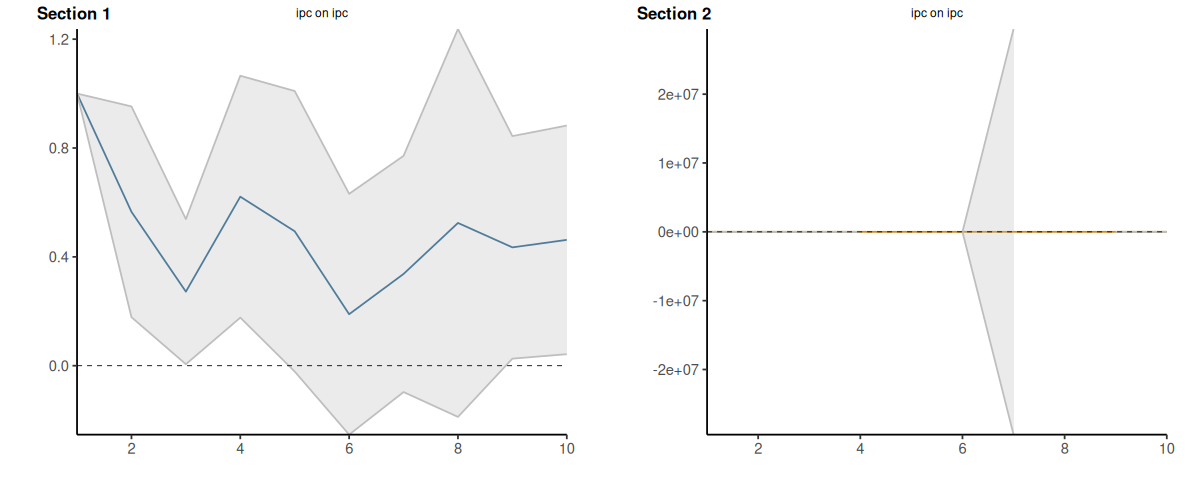

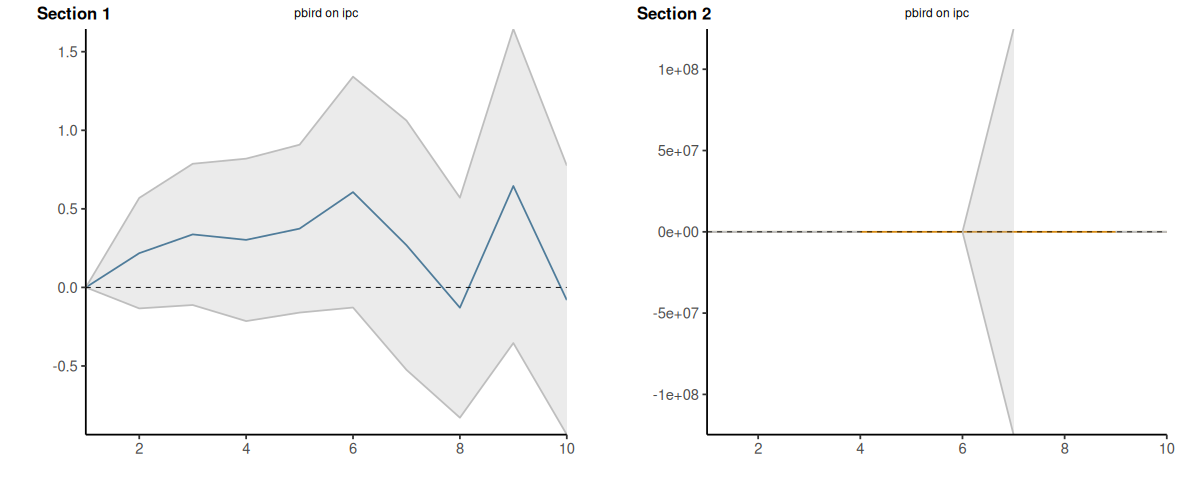

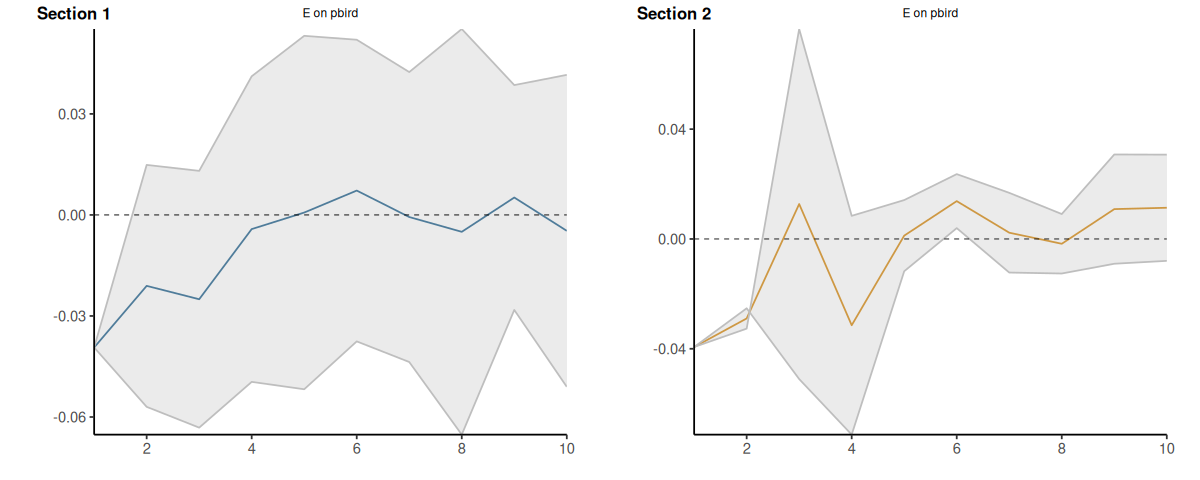

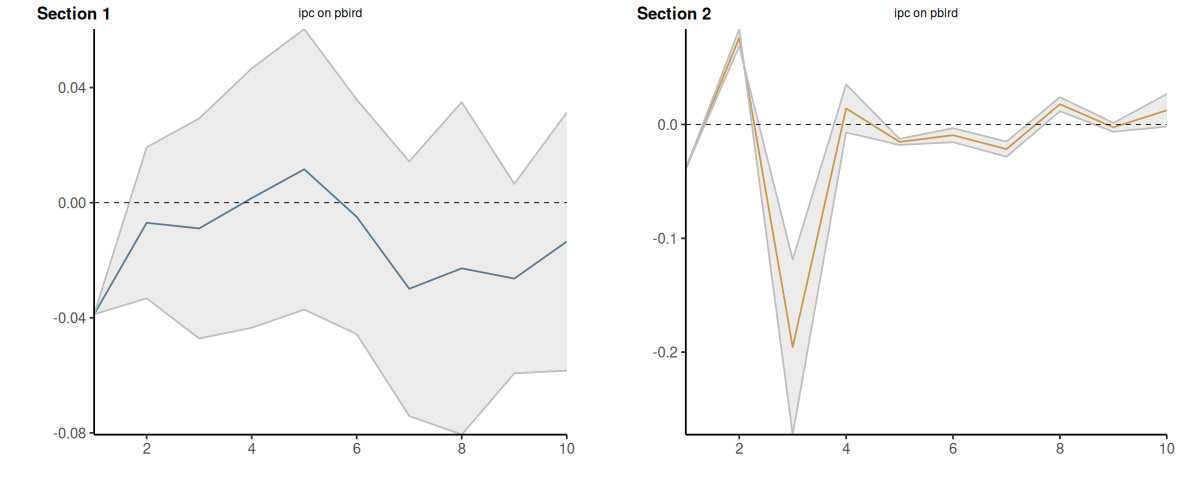

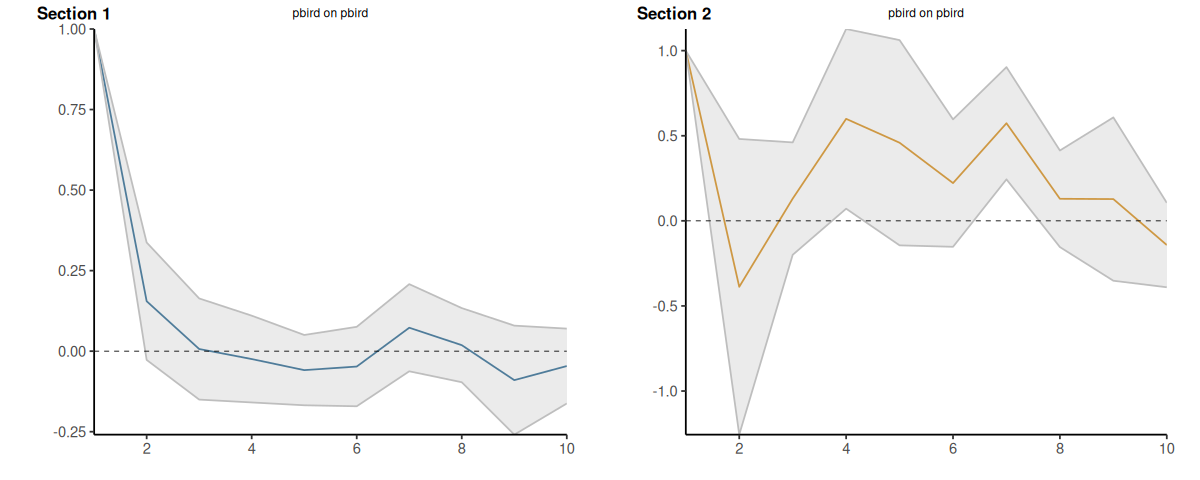

In [6]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 6, horizons = 10, signif = 0.95, trend = 0, cumulative = FALSE, threshold_var = c("D1"))